In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [3]:
df = pd.read_csv('Social_Network_Ads.csv')
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [4]:
df = df.iloc[:,2:]
df.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


### Train Test Spilt

In [5]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(df.drop('Purchased',axis=1),
                                               df['Purchased'],
                                               test_size=0.33,
                                               random_state=42)
X_train.shape, X_test.shape

((268, 2), (132, 2))

### StandardScaler

In [6]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# fit the scaler to the train set, it will learn learn the parameters
scaler.fit(X_train)

# transform train and test sets
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [7]:
scaler.mean_  # mean of each feature in the training set

array([3.75298507e+01, 7.04589552e+04])

In [8]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)
X_train_scaled.head()

,Age,EstimatedSalary
0,2.005223,0.724798
1,-1.227404,-1.431192
2,0.339930,-0.338430
3,-0.933529,0.547593
4,0.437889,0.281786


In [9]:
np.round(X_train.describe(), 1)  # before scaling

,Age,EstimatedSalary
count,268.0,268.0
mean,37.5,70459.0
std,10.2,33922.5
min,18.0,15000.0
25%,30.0,44000.0
50%,37.0,71000.0
75%,45.0,88000.0
max,60.0,150000.0


In [10]:
np.round(X_train_scaled.describe(), 1)  # mean is ~0 and std is ~1

,Age,EstimatedSalary
count,268.0,268.0
mean,-0.0,0.0
std,1.0,1.0
min,-1.9,-1.6
25%,-0.7,-0.8
50%,-0.1,0.0
75%,0.7,0.5
max,2.2,2.3


### Effect of Scaling

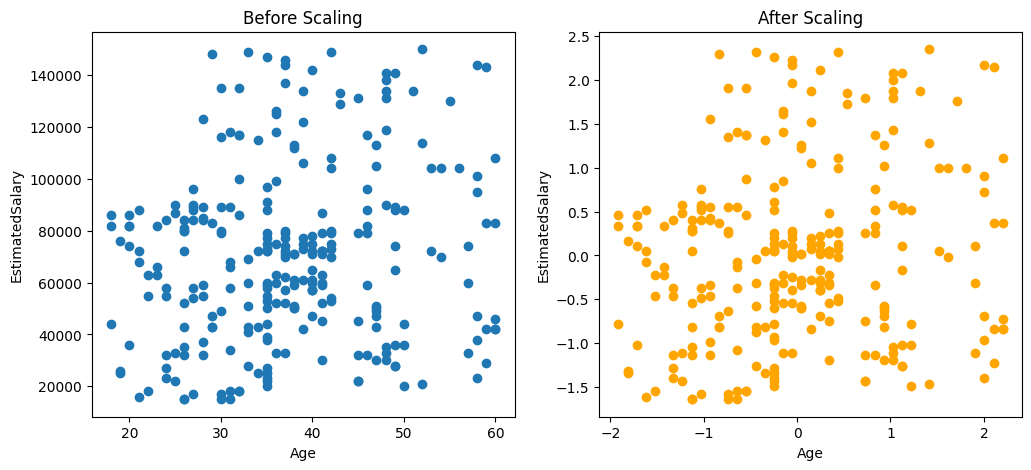

In [12]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(12,5))

ax1.scatter(X_train['Age'], X_train['EstimatedSalary'])
ax1.set_title('Before Scaling') 
ax1.set_xlabel('Age')
ax1.set_ylabel('EstimatedSalary')

ax2.scatter(X_train_scaled['Age'], X_train_scaled['EstimatedSalary'], color='orange')
ax2.set_title('After Scaling')
ax2.set_xlabel('Age')   
ax2.set_ylabel('EstimatedSalary')
plt.show()

### Kdeplot

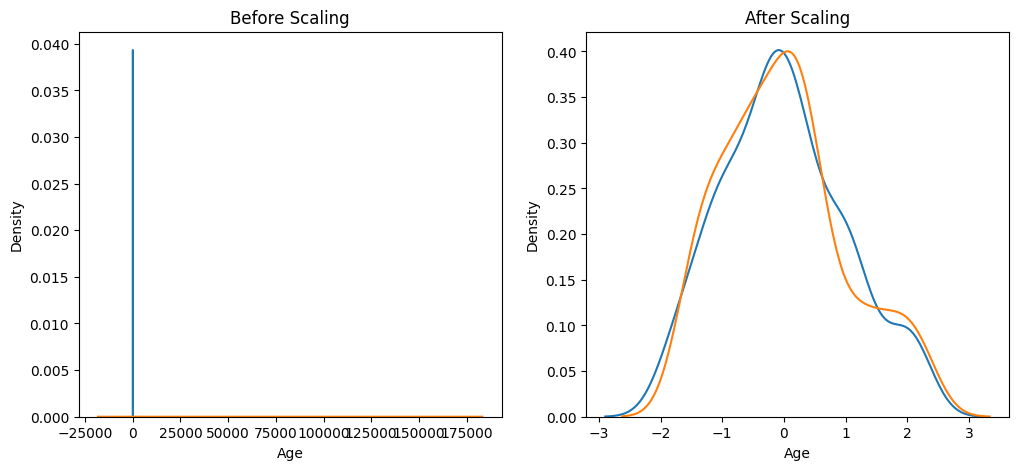

In [14]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Before Scaling
ax1.set_title('Before Scaling')
sns.kdeplot(X_train['Age'], ax=ax1, label='Age')    
sns.kdeplot(X_train['EstimatedSalary'], ax=ax1, label='EstimatedSalary')

# After Scaling
ax2.set_title('After Scaling')
sns.kdeplot(X_train_scaled['Age'], ax=ax2, label='Age')    
sns.kdeplot(X_train_scaled['EstimatedSalary'], ax=ax2, label='EstimatedSalary')
plt.show()

### Comparison of 
- Age

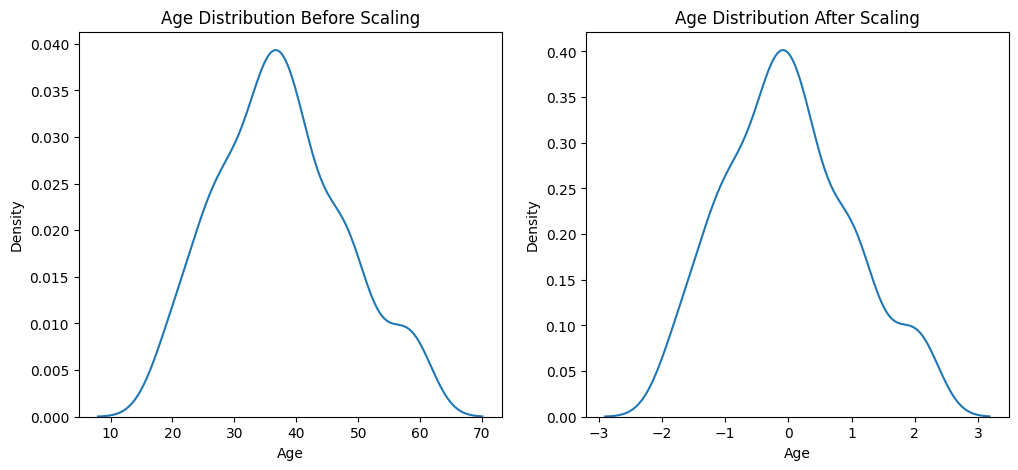

In [16]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Before Scaling
ax1.set_title('Age Distribution Before Scaling')
sns.kdeplot(X_train['Age'], ax=ax1, label='Age')

# After Scaling
ax2.set_title('Age Distribution After Scaling')
sns.kdeplot(X_train_scaled['Age'], ax=ax2, label='Age')
plt.show()

- Salary

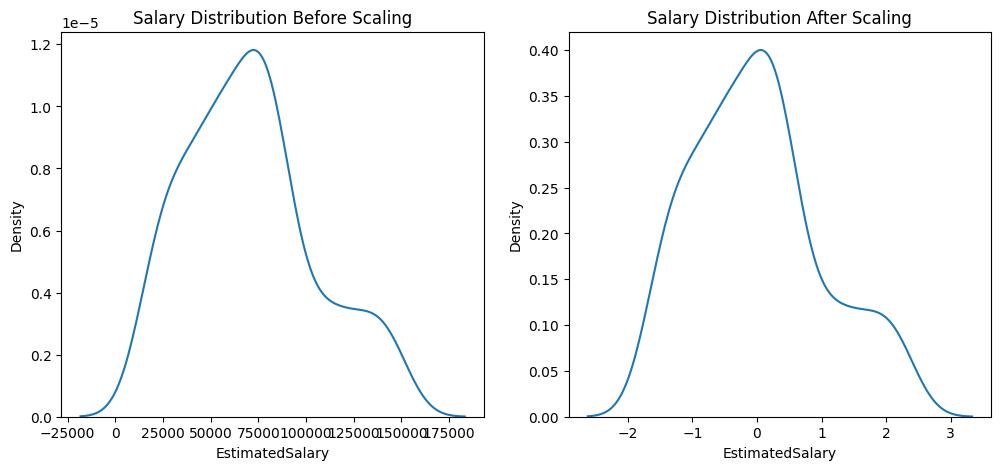

In [18]:
fig, (ax1,ax2) = plt.subplots(ncols=2, figsize=(12,5))


# Before Scaling
ax1.set_title('Salary Distribution Before Scaling')
sns.kdeplot(X_train['EstimatedSalary'], ax=ax1, label='EstimatedSalary')

# After Scaling
ax2.set_title('Salary Distribution After Scaling')
sns.kdeplot(X_train_scaled['EstimatedSalary'], ax=ax2, label='EstimatedSalary')
plt.show()

### Why scaling is important?

In [19]:
from sklearn.linear_model import LogisticRegression

In [20]:
lr=LogisticRegression()
lr_scale=LogisticRegression()

In [21]:
lr.fit(X_train,y_train)
lr_scale.fit(X_train_scaled,y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [22]:
y_pred=lr.predict(X_test)
y_pred_scale=lr_scale.predict(X_test_scaled)

In [23]:
from sklearn.metrics import accuracy_score

In [24]:
print('Accuracy without Scaling:', accuracy_score(y_test,y_pred))
print('Accuracy with Scaling:', accuracy_score(y_test,y_pred_scale))

Accuracy without Scaling: 0.8333333333333334
Accuracy with Scaling: 0.8409090909090909


In [25]:
from sklearn.tree import DecisionTreeClassifier

In [26]:
dt=DecisionTreeClassifier()
dt_scale=DecisionTreeClassifier()

In [27]:
dt.fit(X_train,y_train)
dt_scale.fit(X_train_scaled,y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [30]:
y_pred=dt.predict(X_test)
y_pred_scale=dt_scale.predict(X_test_scaled)

In [31]:
print('Accuracy without Scaling:', accuracy_score(y_test,y_pred))
print('Accuracy with Scaling:', accuracy_score(y_test,y_pred_scale))

Accuracy without Scaling: 0.8636363636363636
Accuracy with Scaling: 0.8636363636363636


In [33]:
df.describe()

,Age,EstimatedSalary,Purchased
count,400.000000,400.000000,400.000000
mean,37.655000,69742.500000,0.357500
std,10.482877,34096.960282,0.479864
min,18.000000,15000.000000,0.000000
25%,29.750000,43000.000000,0.000000
50%,37.000000,70000.000000,0.000000
75%,46.000000,88000.000000,1.000000
max,60.000000,150000.000000,1.000000


### Effect of Outlier

In [36]:
df = pd.concat([df, pd.DataFrame({'Age':[5,90,95],'EstimatedSalary':[1000,250000,350000],'Purchased':[0,1,1]})], ignore_index=True)

In [37]:
df

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0
...,...,...,...
398,36,33000,0
399,49,36000,1
400,5,1000,0
401,90,250000,1


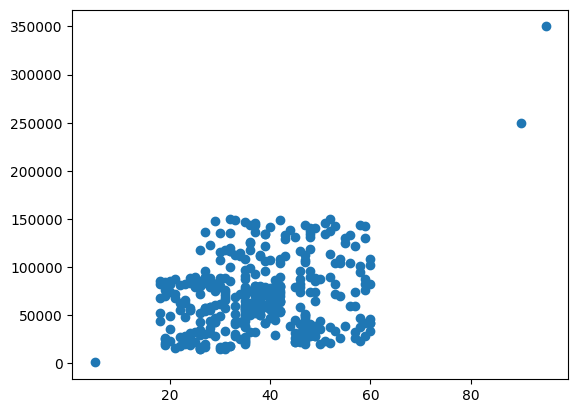

In [38]:
plt.scatter(df['Age'], df['EstimatedSalary'])

In [39]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(df.drop('Purchased',axis=1),
                                               df['Purchased'], 
                                                  test_size=0.3,
                                                    random_state=0)
X_train.shape, X_test.shape

((282, 2), (121, 2))

In [40]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [42]:
# fit the scaler to the train set, it will learn learn the parameters
scaler.fit(X_train)

# transform train and test sets
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [43]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

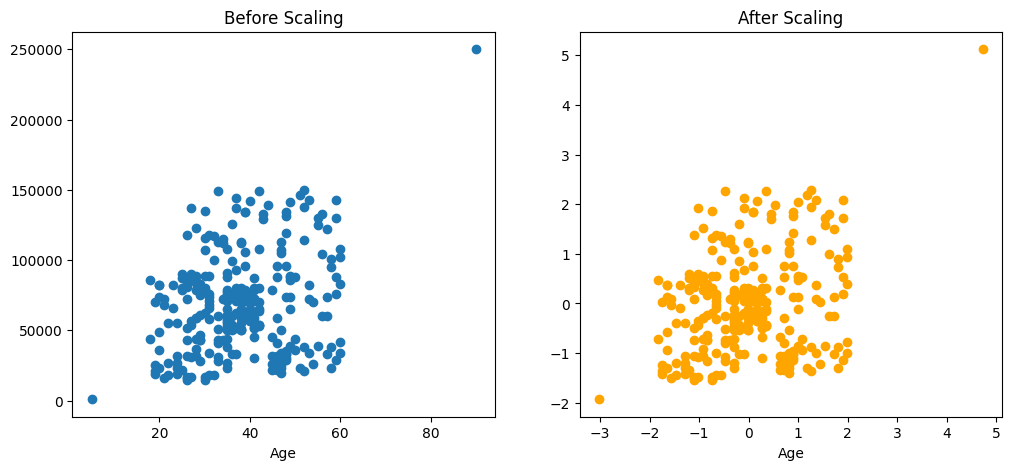

In [44]:
fig, (ax1,ax2) = plt.subplots(ncols=2, figsize=(12,5))

# Before Scaling
ax1.scatter(X_train['Age'], X_train['EstimatedSalary'])
ax1.set_title('Before Scaling')
ax1.set_xlabel('Age')

# After Scaling
ax2.scatter(X_train_scaled['Age'], X_train_scaled['EstimatedSalary'], color='orange')
ax2.set_title('After Scaling')
ax2.set_xlabel('Age')   
plt.show()